In [2]:
# %load /Users/facai/Study/book_notes/preconfig.py
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
#sns.set(font='SimHei', font_scale=2.5)
#plt.rcParams['axes.grid'] = False

#import numpy as np

#import pandas as pd
#pd.options.display.max_rows = 20

#import sklearn

#import itertools

#import logging
#logger = logging.getLogger()

#from IPython.display import SVG
from IPython.display import Image

Chapter 3: Finite Markov Decision Processes 
==========

MDP(Markov Decision Processes): actions influence not just immediate rewards, but also subsequential situations.

### 3.1 The Agent-Environment Interface

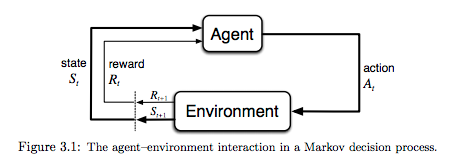

In [3]:
Image('./res/fig3_1.png')

*finite* MDP: the sets of states, actions and rewards all have a finite number of elements.

\begin{align}
    & p(s', r \mid s, a) \doteq \operatorname{Pr} \{ S_t = s', R_t = r \mid S_{t-1} = s, A_{t-1} = a \} \\
    & \displaystyle \sum_{s' \in \mathcal{S}} \sum_{r \in \mathcal{R}} p(s', r \mid s, a) = 1 \quad \text{, for all $s \in \mathcal{S}$, $a \in \mathcal{A}(s)$}
\end{align}


+ state-transition probabilities:

\begin{align*}
    p(s' \mid s, a) & \doteq \operatorname{Pr} \{ S_t = s' \mid S_{t-1} = s, A_{t-1} = a \} \\
                    & = \sum_{r \in \mathcal{R}} p(s', r \mid s, a)
\end{align*}

+ expected rewards for state-action paris:

\begin{align*}
    r(s, a) & \doteq \mathbb{E} \left [ R_t \mid S_{t-1} = s, A_{t-1} = a \right ] \\
            & = \sum_{r \in \mathcal{R}} \left ( r \sum_{s' \in \mathcal{S}} p(s', r \mid s, a) \right )
\end{align*}

+ expected rewards for state-action-next-state triples:

\begin{align*}
    r(s, a, s') & \doteq \mathbb{E} \left [ R_t \mid S_{t-1} = s, A_{t-1} = a, S_t = s' \right ] \\
            & = \sum_{r \in \mathcal{R}} r \frac{p(s', r \mid s, a)}{p(s' \mid s, a)}
\end{align*}

agent-environment boundary represents the limit of the agent's *absolute control*, not of its knowledge.

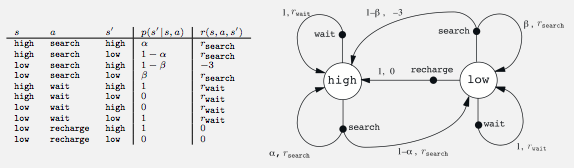

In [5]:
# Transition Graph
Image('./res/ex3_3.png')

##### Exercise 3.4

$r(S_t, a) \; \pi(a \mid S_t)$



### 3.2 Goals and Rewards

goal: to maximize the total amount of reward it receives.

In particular, the reward signal is not the place to impart to the agent prior knowledge about *how* to achieve what it to do.

### 3.3 Returns and Episodes

+ episodic tasks: $G_t \doteq R_{t+1} + R_{t+2} + R_{t+3} + \cdots + R_T$
+ continuing tasks: $G_t \doteq R_{t+1} + \gamma R_{t+2} + \gamma^2 R_{t+3} + \cdots = $